In [ ]:
!pip install roboflow supervision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...


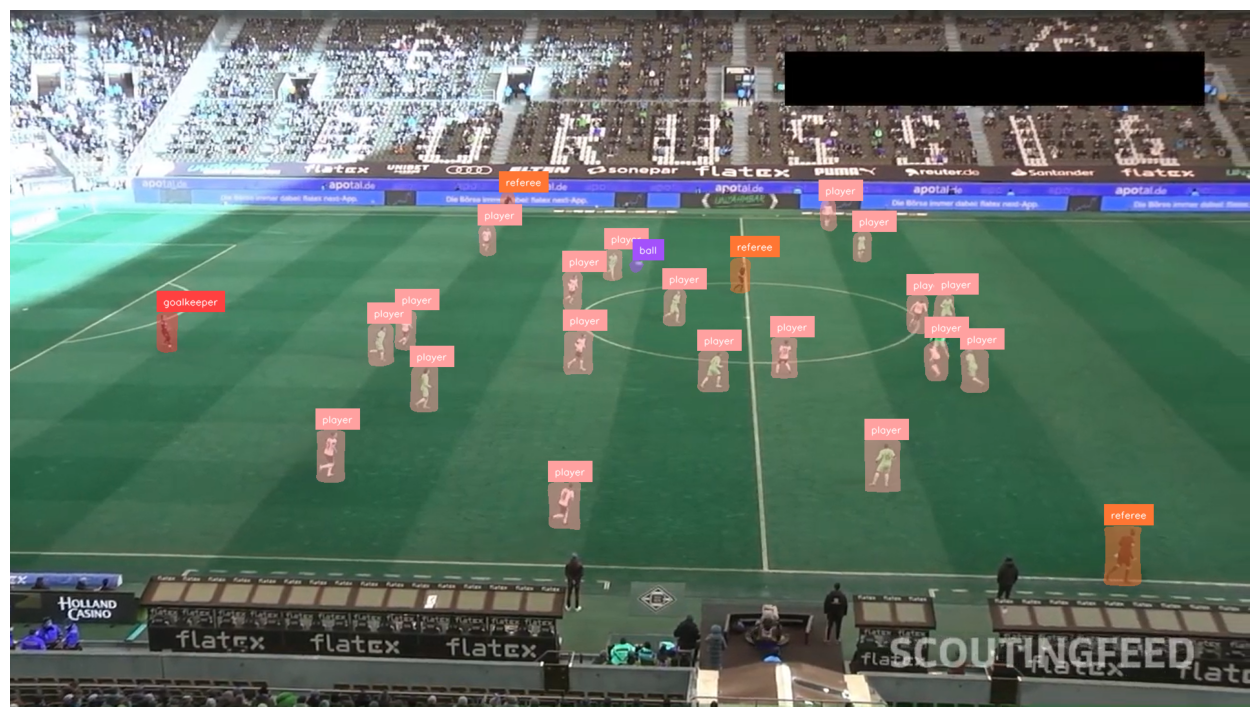

In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2

rf = Roboflow(api_key="2t6xilh0yCbvKGshqtgh")
project = rf.workspace().project("football-rfdetr-seg-jtcdc")
model = project.version(1).model

# Read the image
image = cv2.imread("08fd33.png")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Ensure it's RGB even if it's BGR

result = model.predict(image_rgb, confidence=40).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()

# Ensure the image used for annotation is also RGB
annotated_image = mask_annotator.annotate(
    scene=image_rgb.copy(), detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

**Video Object Detection**

In [ ]:
!pip install roboflow supervision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2
from tqdm import tqdm

# Initialize Roboflow
rf = Roboflow(api_key="2t6xilh0yCbvKGshqtgh")
project = rf.workspace().project("football-rfdetr-seg-jtcdc")
model = project.version(1).model

# Video paths
input_video_path = "08fd33_4.mp4"
output_video_path = "output_annotated_game.mp4"

# Open the video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Initialize annotators
label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()

print(f"Processing video: {total_frames} frames at {fps} FPS")
print(f"Resolution: {width}x{height}")

# Process video frame by frame
frame_count = 0
with tqdm(total=total_frames, desc="Processing frames") as pbar:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Convert BGR to RGB for prediction
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run prediction
        result = model.predict(frame_rgb, confidence=40).json()

        # Extract labels and detections
        labels = [item["class"] for item in result["predictions"]]
        detections = sv.Detections.from_inference(result)

        # Annotate frame
        annotated_frame = mask_annotator.annotate(
            scene=frame_rgb.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame, detections=detections, labels=labels)

        # Convert back to BGR for video writer
        annotated_frame_bgr = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

        # Write frame to output video
        out.write(annotated_frame_bgr)

        frame_count += 1
        pbar.update(1)

# Release everything
cap.release()
out.release()
# cv2.destroyAllWindows()

print(f"\nProcessing complete!")
print(f"Processed {frame_count} frames")

from google.colab import files
files.download('output_annotated_game.mp4')

loading Roboflow workspace...
loading Roboflow project...
Processing video: 297 frames at 30 FPS
Resolution: 1920x1080


Processing frames: 100%|██████████| 297/297 [06:24<00:00,  1.29s/it]


Processing complete!
Processed 297 frames


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>